## Imports

In [30]:
import association_measures as am
import matplotlib as mpl
import more_itertools as more_it
from am_notebooks import *

from source.utils import colors
from source.utils.associate import ALPHA, AM_DF_DIR, TOP_AM_DIR
from source.utils.dataframes import transform_counts
from source.utils.general import confirm_dir
from source.utils.LexicalCategories import SPECIAL_ADV as special
from source.utils.LexicalCategories import TOP_NEG_ADV as manual_neg
from source.utils.LexicalCategories import TOP_POS_ADV as manual_pos

NOTEBOOK_OUT_LABEL = 'TopAdvOverall'
IMAGE_OUT_DIR = IMAGE_DIR/ 'ch3'/ NOTEBOOK_OUT_LABEL
confirm_dir(IMAGE_OUT_DIR)
SHOW_FIGS = False
COLUMN_LIST = ['l2', 'polarity', 'space', 'pos_sample', 'dataset',
               'dP1', 'dP1m', 'LRC', 'LRCm',
               'P1', 'P1m', 'G2',
               'f1', 'f2', 'N',
               'f', 'exp_f', 'unexp_f',
               'f_sqrt', 'f2_sqrt', 'unexp_f_sqrt',
               'N_sqrt',
               'unexp_r',
               'unexp_f_sqrt_m', 'f_sqrt_m', 'f2_sqrt_m', 'unexp_r_m',
               'polar_l2', 'space_l2'
               ] + INVESTIGATE_COLUMN_LIST
print('Date run:', timestamp_today())

Date run: 2025-03-09


In [2]:

print('Top Negatives Collected Previously:', manual_neg, sep='\n', end='\n\n')
print('Top Positives Collected Previously:', manual_pos, sep='\n', end='\n\n')
print('Adverbs of Special Interest:', special, sep='\n', end='\n\n')

Top Negatives Collected Previously:
{'inherently', 'necessarily', 'exactly', 'yet', 'overly', 'only', 'remotely', 'ever', 'especially', 'any', 'longer', 'particularly', 'immediately', 'that', 'terribly'}

Top Positives Collected Previously:
{'relatively', 'largely', 'somewhat', 'maybe', 'otherwise', 'pretty', 'mostly', 'plain', 'rather', 'seemingly', 'downright', 'increasingly', 'fairly', 'almost'}

Adverbs of Special Interest:
{'largely', 'necessarily', 'exactly', 'marginally', 'mostly', 'especially', 'supposedly', 'somewhat', 'yet', 'completely', 'still', 'slightly', 'moderately', 'perfectly', 'ridiculously', 'minimally', 'anyway', 'quite', 'absolutely', 'allegedly', 'fully', 'nearly', 'utterly', 'that', 'totally', 'anymore', 'insanely', 'definitely', 'remotely', 'ever', 'pretty', 'any', 'absurdly', 'rather', 'downright', 'fairly', 'precisely', 'kinda', 'almost'}



In [10]:

plt = mpl.pyplot

# plt.style.use('Solarize_Light2')
# plt.style.use('seaborn-v0_8-deep')
# plt.style.use('seaborn-v0_8-darkgrid')
# plt.style.use('dark_background')
# plt.style.use('seaborn-v0_8-dark-palette')
# plt.style.use('seaborn-v0_8-dark')
# plt.style.use('_mpl-gallery-nogrid')
# plt.style.use('bmh')
# plt.style.use('seaborn-v0_8-pastel')
# plt.style.use('seaborn-v0_8-ticks')
plt.style.use('seaborn-v0_8-paper')
# plt.style.use('seaborn-v0_8-notebook')
# plt.style.use('seaborn-v0_8-whitegrid')
# plt.style.use('seaborn-v0_8-bright')

# plt.rcParams['font.family'] = 'lato'
plt.rcParams['font.family'] = 'serif'

pd.set_option('display.max_colwidth', 20)
pd.set_option('display.max_columns', 12)
pd.set_option('display.max_rows', 80)
pd.set_option('display.width', 90)
pd.set_option("display.precision", 2)
# pd.set_option("styler.format.precision", 2)
pd.set_option("styler.format.thousands", ",")
pd.set_option("styler.sparse.columns", True)
pd.set_option("styler.sparse.index", True)
# pd.set_option("display.float_format", '{:,.2f}'.format)

# print(timestamp_year())
# print(timestamp_month())
# print(timestamp_hour(use_24=False))
# print(timestamp_now(use_24=False))
# print(timestamp_now_trim(use_24=False))
cmap = 'RdPuBu_r'

## Preview Top Adverbs

In [7]:
raw_amdf = pd.read_csv(
    TOP_AM_DIR.joinpath('Top200_ANY-ADV_2000.csv')).convert_dtypes()
# colors.view_gradients()

# highlight_max(set_my_style(raw_amdf.sample(15).set_index(
#     'space_key')))

In [ ]:
# np.random.seed(25)

# bigdf = pd.DataFrame(np.random.randn(20, 25)).cumsum()
index_names = {
    'selector': 'th.row_heading',
    'props': 'font-style: italic; font-weight:bold;'
}
headers = {
    'selector': 'th',
    'props': 'font-family:iosevka; font-size:10.5pt'
}
# raw_amdf.sample(10).set_index(raw_amdf.filter(['l2', 'space', 'polarity']).columns.to_list(
# )).style.set_table_styles([index_names, headers])

In [9]:
# set_my_style(raw_amdf.set_index('space_key').sample(30).filter(regex=r'[PrdfN]')
#  .style.background_gradient(cmap, axis=0)
#     # .set_properties(**{'max-width': '90px', 'font-family': 'iosevka term', 'font-size': '7pt'})
#     # .set_caption("Hover to magnify")
#     # .format(precision=3, thousands=',')
#     # .set_table_styles(magnify())
#     )

In [10]:

amdf = update_amdf(raw_amdf)
# (amdf.set_index(['l2', 'polarity', 'space']).nlargest(20, 'LRC').filter(['tpm_f', 'tpm_f2']).unstack().unstack()
#  )#.style.format('{:,.0f}', na_rep='').set_table_styles([
# #      {'selector': 'th',
# #       'props': 'font-family:iosevka; font-size:10.5pt; text-align:center'
# #       },
# #      {'selector': 'th.row_heading',
# #       'props': 'font-style: italic; font-family:serif; font-weight:bold;'
# #       },
# #      {'selector': 'td',
# #       'props': 'font-family:iosevka aile; font-size:9pt'}
# #  ])

In [11]:
# highlight_max(style_neg_vals(amdf.set_index(['l2', 'polarity', 'space', 'space_key']).filter(
#     regex=r'(N|f)\d?$').sample(20).sort_index()), text='navy', background='lightpink', weight='bold')

In [12]:
# pd.crosstab(amdf.l2, [amdf.polarity, amdf.space], values=amdf.tpm_f_sqrt, aggfunc='sum').sample(
#     15).style.background_gradient('purple_rain').format(na_rep='')
# amdf.set_index('space_key').filter(regex=r'_r_?|f').sort_values(
#     ['unexp_r_m', 'unexp_f_sqrt'], ascending=False).head(10)

In [13]:
# for pol, pdf in amdf.copy().groupby('polarity'):
#     for sam, spdf in pdf.groupby('space'):
#         spdf.plot(kind='scatter', x='unexp_f_sqrt', y='LRCm',
#                   grid=True, xlim=(0, 400), ylim=(0, 6),
#                   title=f'{sam}: {pol}itive environments'.replace('gi', 'ga'))

In [14]:
n_top_adv = 10
amdf = amdf.reset_index().set_index('space_key')
top_adv_df = (
    pd.concat(
        [d.nlargest(n_top_adv, f'{m}m')
         for __, d in amdf.groupby('space', observed=True)
         for m in ['dP1', 'LRC', 'P1']]
        + [amdf.loc[
            (amdf.polarity == 'neg')
            & (amdf.l2.isin(manual_neg)), :],
            amdf.loc[
            (amdf.polarity == 'pos')
            & (amdf.l2.isin(manual_pos)), :]])
    .filter(COLUMN_LIST)  # ! KeyError: "['space_l2'] not in index"
    .drop_duplicates()
    .sort_values(['dP1m', 'LRC', 'P1'], ascending=False))
# top10_adv_df.value_counts(['polarity', 'l2'])
# top_adv_df.set_index(['polarity', 'l2', 'space'])

In [15]:
def adv_metric_m(_adv_df, verbose: bool = True):
    top_info = _adv_df  # .loc[_adv_df.LRCm >= 0.2, :]
    top_info = top_info.sort_values(
        ['dP1m', 'LRC'], ascending=False
    ).copy().filter(
        regex=r'(polar_l2|polarity|^l2)|((tpm_f|f)2?_sqrt_|tpm_f_|[tpm_]*unexp_f_sqrt_|unexp_r_|dP1|P1|LRC)m'
    ).drop_duplicates().reset_index(drop=True)
    if verbose:
        nb_show_table(top_info)
    return top_info


top_adv_info = adv_metric_m(top_adv_df, verbose=False)
nb_display(top_adv_info.set_index(['polarity', 'polar_l2','l2', ]).sort_index().style.background_gradient(cmap))
# nb_show_table(top_adv_info, suppress_printing=True,
#               outpath='/share/compling/projects/sanpi/info/writing_links/imports/tables/overallTopAdvAM_avg-metric-overview.md')
# top10_adv.reset_index(drop=True)

top_adv = top_adv_info.l2.drop_duplicates()

In [16]:
# highlight_max(style_neg_vals(
#     top_adv_df.sort_values(by=['f2', 'N'], ascending=False)
#     .sort_values(by=['dP1', 'LRC'], ascending=False)
#     .set_index(['polarity', 'space', 'l2']),
#     index_font='iosevka aile'
# ), weight='bold', background='navy', text='yellow')

In [17]:
def print_by_adv(adv_iter, adv_amdf: pd.DataFrame, return_str: bool = False):
    # adv_am_dict = {a:d for a, d in adv_ams.groupby('l2')}
    tables = []
    for i, adv in enumerate(adv_iter):
        adf = adv_amdf.loc[adv_amdf.l2 == adv, :]
        section_label = f'\n#### {i+1}. *{adv}*\n'
        print(section_label)
        tables.append(section_label)
        mean_est = (adf.filter(regex=r'm$|polarity')
                    .drop_duplicates().set_index('polarity').squeeze())
        # print(mean_est)
        mean_tab = nb_show_table(mean_est.to_frame('mean estimates')
                                 if isinstance(mean_est, pd.Series) else mean_est,
                                 title='Metrics Averaged Across ADV by Polarity',
                                 transpose=True,
                                 return_table=return_str)
        tables.append(mean_tab or '')
        adf = adf.filter(regex=r'[^m]$')
        # if adf.polarity.nunique() != 1:
        #     print(
        #         f'!!! Warning *{adv}* appearing with different polarities')
        for pol_l2, pol_adf in adf.groupby('polar_l2', observed=True):
            sub_tables = []
            subsection_label = f'\n##### {pol_l2}'
            print(subsection_label)

            adv_vals = pol_adf.assign(
                polar_space=pol_adf.space +
                pol_adf.polarity.map({'neg': '(-)', 'pos': '(+)'})
            ).set_index('polar_space').sort_values(['space', 'f1'], ascending=False)
            titles = ('Primary Metrics', 'Secondary Metrics', 'Frequencies')
            sub_tables.extend(
                [
                    (
                        nb_show_table(
                            (adv_vals
                             .select_dtypes(include='float')
                             .iloc[:, :4]),
                            title=titles[0],
                            return_table=return_str)
                        or ''
                    ),
                    (
                        nb_show_table(
                            (adv_vals
                             .select_dtypes(include='float')
                             .iloc[:, 4:]
                             .sort_index(axis=1)),
                            title=titles[1],
                            return_table=return_str)
                        or ''
                    ),
                    (
                        nb_show_table(
                            (adv_vals
                             .select_dtypes(include='integer')),
                            title=titles[2],
                            return_table=return_str)
                        or ''
                    )
                ]
            )
            if any(sub_tables):
                tables.append('\n\n'.join(
                    more_it.prepend(subsection_label, more_it.roundrobin(titles, sub_tables))))

    return tables if return_str else None
# print_by_adv(top_adv, top_adv_df)

## Retrieve <u>*ALL*</u> Values

In [11]:
top_adv_overall_csv = TOP_AM_DIR.joinpath(f'top_adv_overall.{timestamp_year()}.csv')
if top_adv_overall_csv.is_file():
    target_adv_set = pd.read_csv(top_adv_overall_csv, dtype='string').squeeze()
    print(f'Loaded {len(target_adv_set)} adverbs from: "{top_adv_overall_csv}"')
else:
    target_adv_set = pd.Series(sorted(special
                                  .union(top_adv)
                                  .union(manual_neg)
                                  .union(manual_pos)),
                           dtype='string')
    target_adv_set.to_csv(top_adv_overall_csv, index=False,header=False)
    print(f'List of adverbs saved to:\n    {top_adv_overall_csv}')
# target_adv_set.info()
print(
    f'Total Possible Evaluations:  \n    {len(target_adv_set) * 4 * 2} = {len(target_adv_set)} adverbs ✕ 4 comparison spaces ✕ 2 polarities')
print(f'    > "{target_adv_set.iloc[0]}" through "{target_adv_set.iloc[-1]}"')
# print_iter(sorted(target_adv_set))

Loaded 54 adverbs from: "/share/compling/projects/sanpi/results/top_AM/top_adv_overall.2025.csv"
Total Possible Evaluations:  
    432 = 54 adverbs ✕ 4 comparison spaces ✕ 2 polarities
    > "absurdly" through "yet"


In [12]:
all_adv_df = load_all_relevant_ams(
    target_adv_set, label=f'TopAdvOverall{timestamp_year()}')

# all_adv_df.filter(regex=r'LRC$|LRC_[01][01]').apply(
#     lambda c: c - all_adv_df.LRC
#     ).assign(
#     fN=all_adv_df.f/all_adv_df.N
#     ).sort_values('fN').filter(like='LRC').plot()
# all_adv_df.filter(regex=r'LRC$|LRC_\d').assign(fN=all_adv_df.f/all_adv_df.N).sort_values('fN').filter(like='LRC').plot()
all_adv_df = all_adv_df.filter(COLUMN_LIST)
# all_adv_df


▸ RBdirect/adv/extra/
▸ mirror/adv/extra/


%%%%%%%%%%%%%%%%%

▸ RBdirect/adv/extra/polarized-adv_NEQ-direct_min1x_extra.parq
▸ RBdirect/adv/extra/polarized-adv_ALL-direct_min1x_extra.parq


+ NEQ+sup
  polar/RBdirect/adv/extra/polarized-adv_NEQ-direct_min1x_extra.parq
  > exhaustive path (for target set)
    "polar/RBdirect/adv/extra/polarized-adv_NEQ-direct_min0x-TopAdvOverall2025_extra.parq"
  loading from prior exhaustive processing in "polar/RBdirect/adv/extra/polarized-adv_NEQ-direct_min0x-TopAdvOverall2025_extra.parq"

+ ALL+sup
  polar/RBdirect/adv/extra/polarized-adv_ALL-direct_min1x_extra.parq
  > exhaustive path (for target set)
    "polar/RBdirect/adv/extra/polarized-adv_ALL-direct_min0x-TopAdvOverall2025_extra.parq"
  loading from prior exhaustive processing in "polar/RBdirect/adv/extra/polarized-adv_ALL-direct_min0x-TopAdvOverall2025_extra.parq"

%%%%%%%%%%%%%%%%%

▸ mirror/adv/extra/polarized-adv_ALL-mirror_min1x_extra.parq
▸ mirror/adv/extra/polarized-adv_NEQ-mirror_mi

The following are the observations that _do_ exist for those adverbs 
which **lack** representation in at least one comparison space polarity: 

**_anymore_** and **_before_** were completely non-attested in the Negative Equivalent sample of the Positive Mirror data.

(_And this is an <u>actual</u> lack, as the loaded data has a minimum observed joint freuquency of `1`._)

In [13]:
def show_incomplete(_df):
    incomplete = (_df[_df.l2.apply(
        lambda a:
        _df.value_counts('l2')[a] < 8)]
        .sort_values('l2'))
    if incomplete.empty:
        print('All adverbs fully accounted for ✓')
    else:
        return style_neg_vals(incomplete,
                              neg_color='orange',
                              neg_weight='bold', index_font='ebrima')


def fill_empties(all_adv_df):
    if len(all_adv_df) == all_adv_df.l2.nunique() * 8:
        print('No empty values')
        return

    # missing in NEQ, replace with ALL
    space_l2_totals = all_adv_df.copy().assign(
        l2=all_adv_df.l2.astype('category'),
        space=all_adv_df.space.astype('category')
    ).value_counts(['l2', 'space'])

    existing = space_l2_totals.loc[space_l2_totals < 2, :].reset_index()
    existing = all_adv_df.loc[(all_adv_df.l2.isin(existing.l2)) & (
        all_adv_df.space.isin(existing.space)), :].reset_index()
    missing = existing[['l2', 'space']].assign(
        polarity=existing.polarity.map({'neg': 'pos', 'pos': 'neg'}),
        space_key=existing.space_key.apply(lambda s: s.replace('NEG', 'POS')
                                           if s.find('NEG') >= 0
                                           else s.replace('POS', 'NEG'))
    ).reset_index(drop=True).set_index('space_key')

    neX = existing.set_index('l2')
    new = pd.concat(
        [all_adv_df, missing]
    ).loc[missing.index, :].reset_index().set_index('l2')
    new = new.assign(
        f2=neX.f2,
        N=neX.N,
        f=0,
        P1=0.0,
        f_sqrt=0,
        f2_sqrt=neX.f2_sqrt,
        f1=all_adv_df.filter(like='NEQ+mir:P', axis=0).f1.iloc[0],
        LRC=neX.LRC * -1,
        dP1=neX.dP1 * -1,
    )

    _frq = am.frequencies.observed_frequencies(new).join(
        am.frequencies.expected_frequencies(new))
    new = new.assign(
        G2=am.measures.log_likelihood(_frq),
        # LRC = am.measures.conservative_log_ratio(g2plus, alpha=ALPHA),
        exp_f=_frq.E11,
        # dP1 = new.apply(deltaP, axis=1)
    )

    new.loc[:, 'unexp_f'] = new.f - new.exp_f
    new.loc[:, 'unexp_r'] = new.unexp_f / 0.000001
    new = new.convert_dtypes()
    # print(new.to_markdown(floatfmt=',.1f',tablefmt='fancy_outline',intfmt=','))
    return new.reset_index().set_index('space_key')


show_incomplete(all_adv_df)
new = fill_empties(all_adv_df)
if new:
    nb_display(
        new.sort_values('f').style
        .format(precision=1, thousands=',', na_rep='')
        .highlight_min(subset=['f'], props='font-weight:bold; color:orange'))
    all_adv_df = pd.concat([all_adv_df, new])
    # style_neg_vals(all_adv_df,
    #             neg_color='orange',
    #             neg_weight='bold', index_font='ebrima')

all_adv_df = update_amdf(all_adv_df)
# all_adv_df
show_incomplete(all_adv_df)
set_my_style(style_neg_vals(all_adv_df.loc[all_adv_df.f == 0, :].filter(
    regex=r'(unexp_f|f)$'), neg_weight='bold', neg_color='hotpink', index_font='CMU Bright'), 
             caption='Adverbs with Zero Frequency',)

All adverbs fully accounted for ✓
No empty values
All adverbs fully accounted for ✓


,f,exp_f,unexp_f,tpm_f,tpm_exp_f,tpm_unexp_f
space_key,,,,,,
NEQ+mir:POS~anymore,0,7.50,-7.50,0.0,12.85,-12.85
NEQ+mir:POS~before,0,144.50,-144.50,0.0,247.66,-247.66


In [23]:
for metric_col in ['dP1', 'LRC', 'G2', 'tpm_unexp_f', 'unexp_r']:
    sty_cross = style_crosstab(
        all_adv_df.reset_index(), ['l2'], [
            'polarity',
            'dataset',  # 'approx_meth',
            'pos_sample',
            # 'space',
        ], metric_col, aggfunc='mean',
        group_col='pos_sample',
        # group=False,
        cmap=cmap, 
        cmap2=cmap, 
        sort_col_vals=(
            'neg', 
            'super',
            'ALL', 
            ), 
        axis=None, 
        # mark_zeros=True, 
        latex=True, 
        prefilter_label=NOTEBOOK_OUT_LABEL, 
    )
    # dP1_cross_style = sty_dP1_cross.export()
    nb_display(sty_cross.set_caption(f'<code>{metric_col}</code> by for Top Adverbs Overall by Polarity, Dataset, and Sampling<br/>Gradient Grouped on <u>Pos Sample</u>'))

Caption: Crosstabulated <code>dP1</code> (as mean)<br/>color gradient set by <u>whole group</u>
Stylized latex table saved as:
  OverleafDissertex/assets/tables/TopAdvOverall/l2_dP1-mean_polarity-dataset-pos_sample_color-table_grouped.2025-03-09.tex



Caption: Crosstabulated <code>LRC</code> (as mean)<br/>color gradient set by <u>whole group</u>
Stylized latex table saved as:
  OverleafDissertex/assets/tables/TopAdvOverall/l2_LRC-mean_polarity-dataset-pos_sample_color-table_grouped.2025-03-09.tex



Caption: Crosstabulated <code>G2</code> (as mean)<br/>color gradient set by <u>whole group</u>
Stylized latex table saved as:
  OverleafDissertex/assets/tables/TopAdvOverall/l2_G2-mean_polarity-dataset-pos_sample_color-table_grouped.2025-03-09.tex



Caption: Crosstabulated <code>tpm_unexp_f</code> (as mean)<br/>color gradient set by <u>whole group</u>
Stylized latex table saved as:
  OverleafDissertex/assets/tables/TopAdvOverall/l2_tpm_unexp_f-mean_polarity-dataset-pos_sample_color-table_grouped.2025-03-09.tex



Caption: Crosstabulated <code>unexp_r</code> (as mean)<br/>color gradient set by <u>whole group</u>
Stylized latex table saved as:
  OverleafDissertex/assets/tables/TopAdvOverall/l2_unexp_r-mean_polarity-dataset-pos_sample_color-table_grouped.2025-03-09.tex



In [ ]:
# (style_crosstab(all_adv_df.sort_values('dP1', ascending=False),
#                 rows=['l2'], columns=['pos_sample', 'dataset', 'polarity'],
#                 value_col='tpm_unexp_f', aggfunc='mean', cmap='anastasia',
#                 precision=1, sort_col_vals=('ALL', 'super', 'neg'))
#  #  .set_properties(**{'border': '1px solid white'})
#  )

In [ ]:
# (style_crosstab(all_adv_df,
#                 rows=['l2'], columns=['pos_sample', 'polarity'],
#                 value_col='LRC', aggfunc='mean',
#                 group=True, axis=None,  cmap='hot',
#                 precision=2, sort_col_vals=('NEQ', 'neg'))
#  #  .set_properties(**{'border': '1px solid white'})
#  )

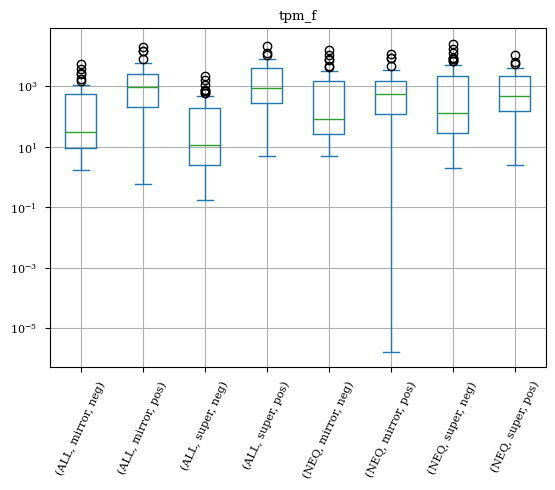

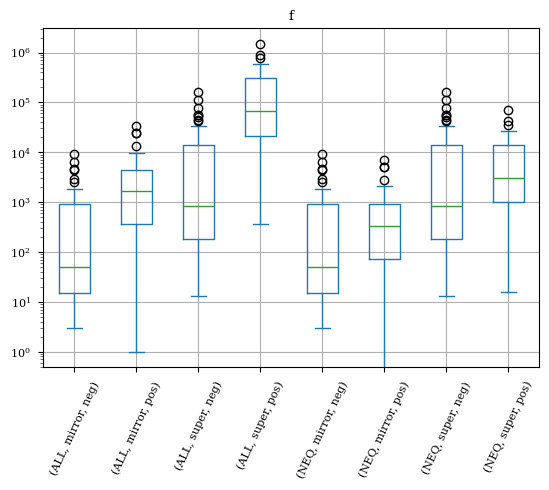

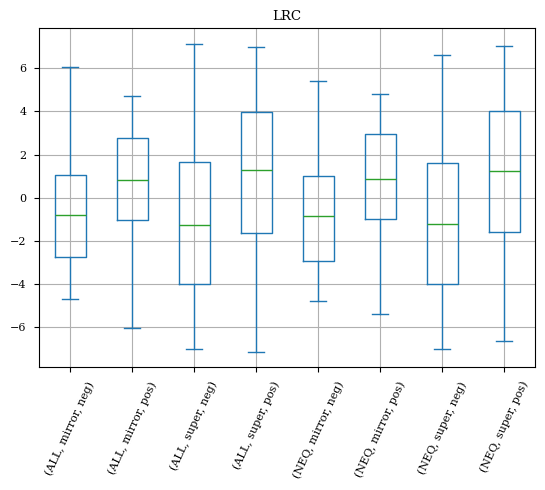

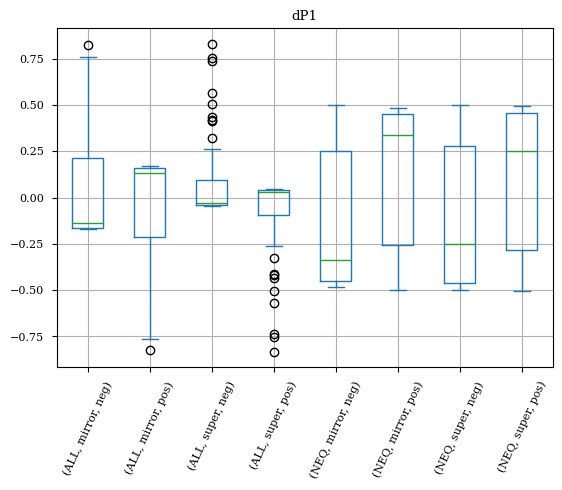

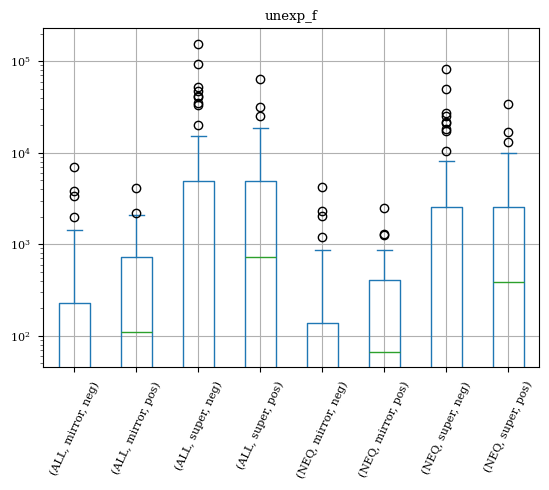

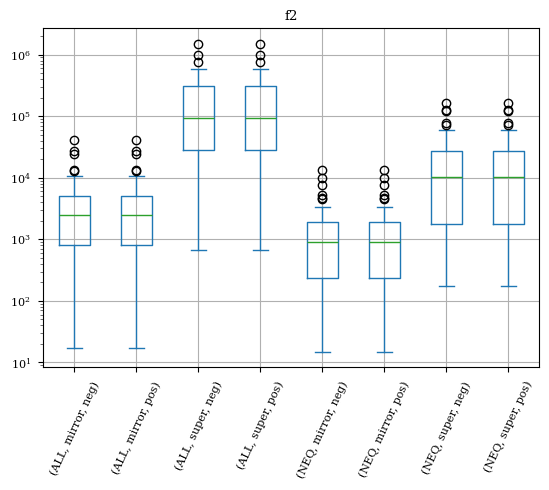

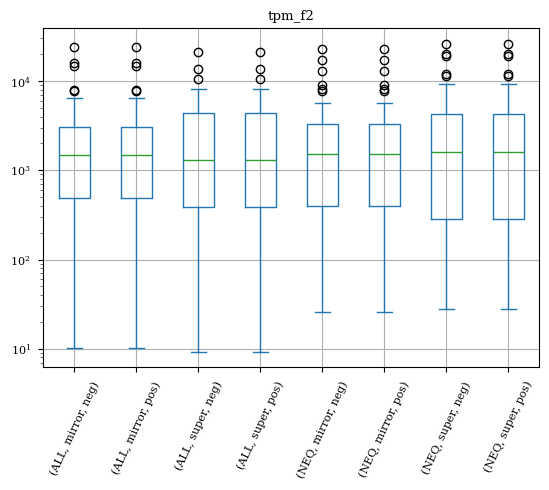

In [100]:
for metric in ['tpm_f', 'f', 'LRC', 'dP1', 'unexp_f', 'f2', 'tpm_f2']:
    _df = all_adv_df[[metric, 'pos_sample', 'dataset', 'l2','polarity']].set_index(['l2', 'polarity','pos_sample','dataset']).unstack(
        ['pos_sample','dataset', 'polarity']
        # ['l2']
        ).droplevel(0, axis=1).sort_index(axis=1)
    _df.plot(kind='box', title=metric, grid='y', rot=65,
             logy=metric.endswith(('f','f2'))
             )

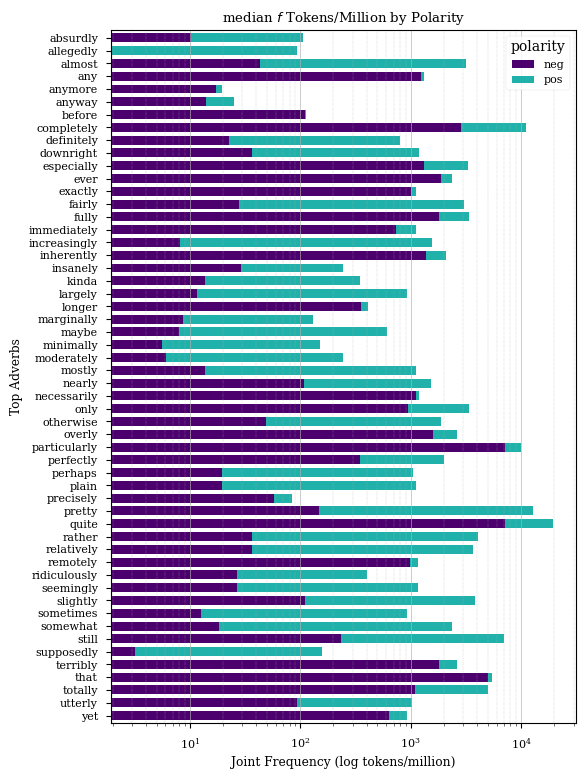

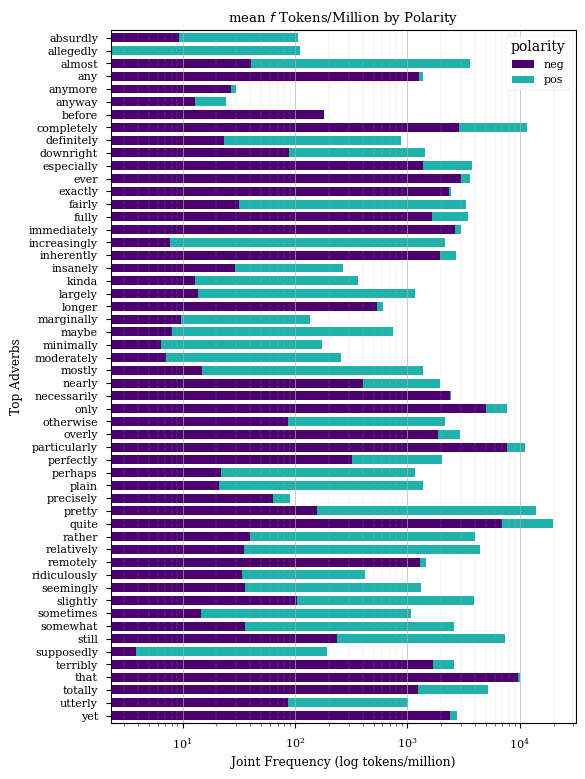

In [53]:
for median in [True, False]:
    _crossdf_to_plot = style_crosstab(all_adv_df, ['l2',], ['polarity'],
                sort_col_vals=('neg'), axis=None,
                value_col='tpm_f', 
                aggfunc='median' if median else 'mean', 
                cmap='purple_rain', cmap2='Blues', group=True,
                return_cross_df=True
                ).sort_index(ascending=False)
    _ax = _crossdf_to_plot.plot(
        kind='barh', figsize=(6,9), 
        # title='Mean $f$ by Polarity', 
        title=f'{"median" if median else "mean"} $f$ Tokens/Million by Polarity', 
        width=0.7, colormap='deep_waters', 
        stacked=True, logx=True, 
        ylabel='Top Adverbs',
        xlabel = 'Joint Frequency (log tokens/million)')

    _ax.xaxis.grid(True, which='major', linestyle='-',
                    linewidth=0.45)  # Major grid line style
    _ax.xaxis.grid(True, which='minor', linestyle=':',
                    linewidth=0.35)  # Minor grid line style
    for suff in ['.pgf', '.png']:
        plt.savefig(
            IMAGE_OUT_DIR.joinpath(f'TopAdvOverall-{"median" if median else "mean"}Ftpm-x-polarity-logX-{timestamp_month()}{suff}'),
            dpi=300, bbox_inches='tight', pad_inches=0.05)

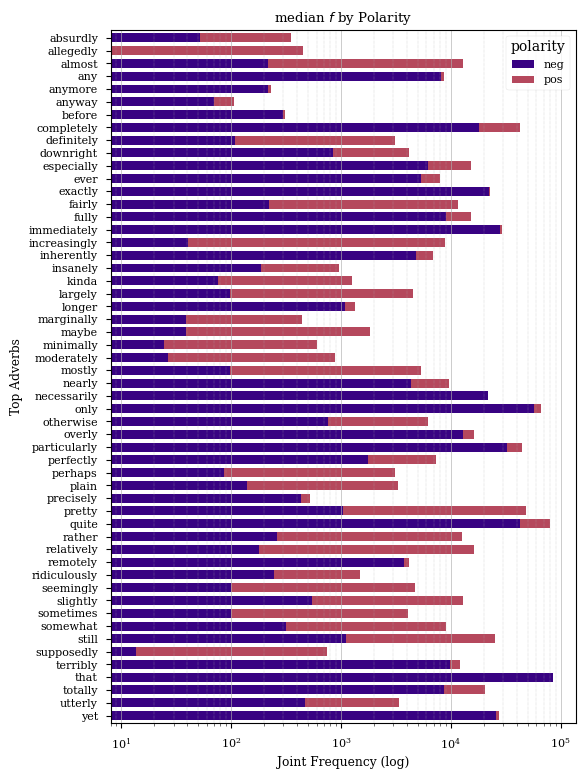

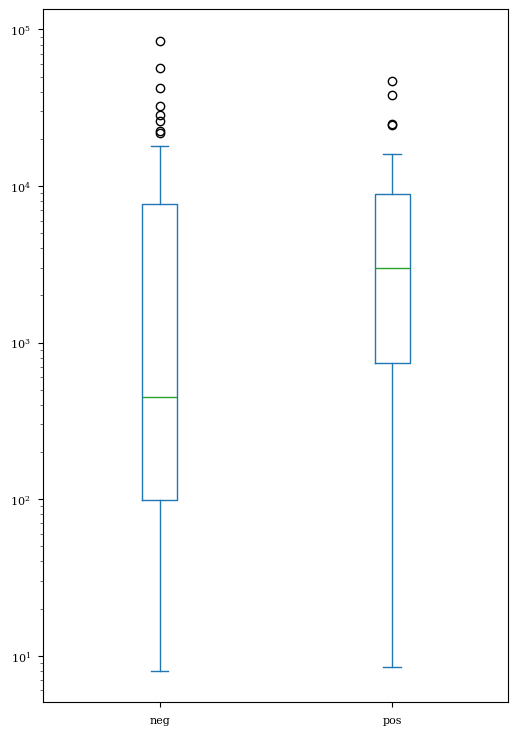

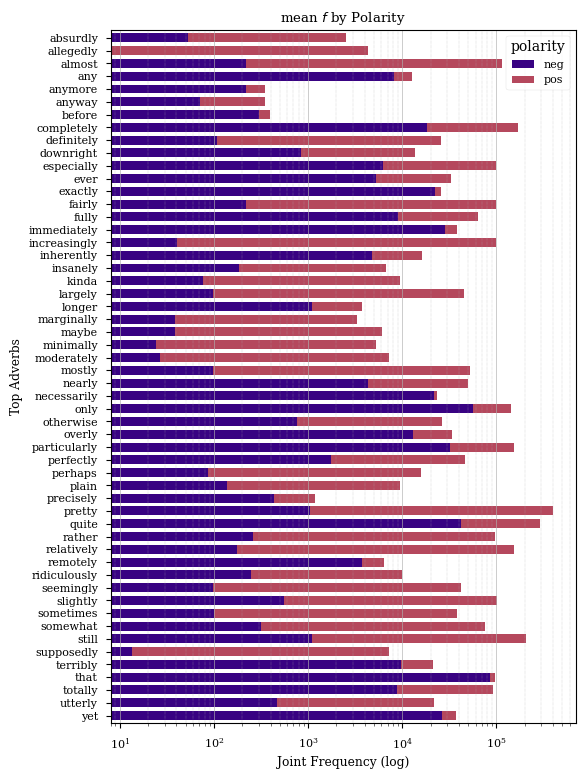

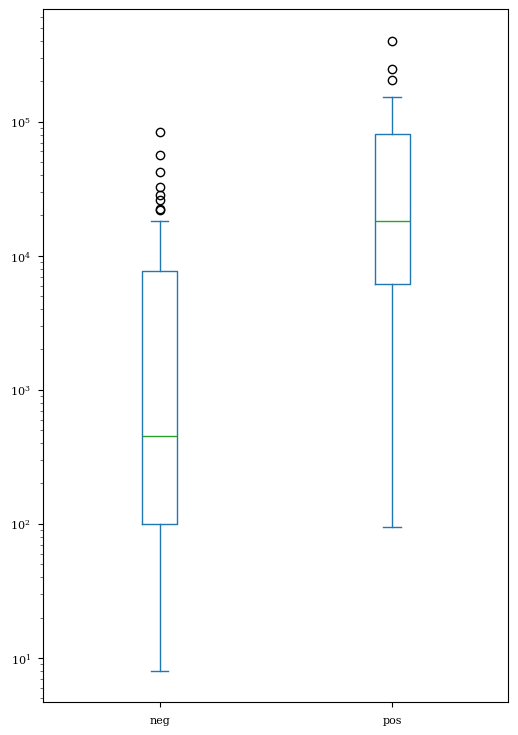

In [ ]:
for median in [True, False]:
    _crossdf_to_plot = style_crosstab(all_adv_df, ['l2',], ['polarity'],
                sort_col_vals=('neg'), axis=None,
                value_col='f', 
                aggfunc='median' if median else 'mean', 
                cmap='purple_rain', cmap2='Blues', group=True,
                return_cross_df=True
                ).sort_index(ascending=False)
    _ax = _crossdf_to_plot.plot(
        kind='barh', figsize=(6,9), 
        # title='Mean $f$ by Polarity', 
        title=f'{"median" if median else "mean"} $f$ by Polarity', 
        width=0.7, colormap='lilac_rose', 
        stacked=True, logx=True, 
        ylabel='Top Adverbs',
        xlabel = 'Joint Frequency (log)')

    _ax.xaxis.grid(True, which='major', linestyle='-',
                    linewidth=0.45)  # Major grid line style
    _ax.xaxis.grid(True, which='minor', linestyle=':',
                    linewidth=0.35)  # Minor grid line style
    for suff in ['.pgf', '.png']:
        plt.savefig(
            IMAGE_OUT_DIR.joinpath(f'TopAdvOverall-{"median" if median else "mean"}F-x-polarity-logX-{timestamp_month()}{suff}'),
            dpi=300, bbox_inches='tight', pad_inches=0.05)

# style_crosstab(all_adv_df.filter(like='NEG', axis=0), ['polarity','l2',], ['space'], 'tpm_f', aggfunc='median', axis=1, group=False)

# style_crosstab(all_adv_df.filter(like='POS', axis=0), ['polarity','l2',], ['space'], 'tpm_f', aggfunc='median', axis=1, group=False)

In [ ]:
style_crosstab(all_adv_df, ['l2'], ['dataset', 'pos_sample', 'polarity'],
               sort_col_vals=('super', 'NEQ', 'neg', ),
               value_col='LRC',
               axis=None,
               #    group=False,
               aggfunc='mean',
               # cmap2='lilac_rose',
               cmap='anastasia')

In [ ]:
style_crosstab(all_adv_df, ['l2'],  ['pos_sample', 'dataset', 'polarity'],
               sort_col_vals=('NEQ', 'super', 'neg'),
               aggfunc='mean',
               group=True,
               axis=None,
               cmap='anastasia',
               value_col='dP1')

In [ ]:
style_crosstab(all_adv_df, ['l2'],  ['pos_sample', 'polarity', 'dataset'], axis=None, mark_zeros=False,
               value_col='P1', aggfunc='mean', cmap='anastasia', cmap2='lilac_rose', sort_col_vals=('NEQ', 'neg', 'super'))

In [ ]:
style_crosstab(all_adv_df, ['l2', 'polarity'],  ['pos_sample', 'dataset'], axis=0, mark_zeros=True,
               value_col='LRC', aggfunc='mean', cmap='anastasia', sort=False
               #    sort_col_vals=('NEQ','neg','super')
               )

In [ ]:
style_crosstab(all_adv_df, ['l2'],  ['pos_sample', 'dataset', 'approx_meth'],
               value_col='tpm_f2_sqrt', aggfunc='mean', axis=None, group=False,
               cmap='anastasia', sort_col_vals=('ALL', 'super', 'absent(-)'))

In [ ]:
# cmap_list = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r',
#              'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r',
#              'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r',
#              'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r',
#              'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r',
#              'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn',
#              'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'anastasia', 'anastasia_r',
#              'aqua_purple', 'aqua_purple_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'blue_black_pink', 'blue_black_pink_r',
#              'blue_dark_pink', 'blue_dark_pink_r', 'blue_light_purple', 'blue_light_purple_r', 'bone', 'bone_r', 'brg', 'brg_r',
#              'bruise', 'bruise_r', 'bwr', 'bwr_r', 'catmap', 'catmap10_smoothie', 'catmap10_smoothie_r', 'catmap12_smoothie', 'catmap12_smoothie_r',
#              'catmap3_smoothie', 'catmap3_smoothie_r', 'catmap4_smoothie', 'catmap4_smoothie_r', 'catmap5_smoothie', 'catmap5_smoothie_r',
#              'catmap6_smoothie', 'catmap6_smoothie_r', 'catmap7_smoothie', 'catmap7_smoothie_r', 'catmap8_smoothie', 'catmap8_smoothie_r',
#              'catmap9_smoothie', 'catmap9_smoothie_r', 'catmap_r', 'cerulean_royalty', 'cerulean_royalty_dark', 'cerulean_royalty_dark_r',
#              'cerulean_royalty_dkbl', 'cerulean_royalty_dkbl_r', 'cerulean_royalty_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r',
#              'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'deep_waters', 'deep_waters_r', 'easter', 'easter10_smoothie', 'easter10_smoothie_r',
#              'easter12_smoothie', 'easter12_smoothie_r', 'easter3_smoothie', 'easter3_smoothie_r', 'easter4_smoothie', 'easter4_smoothie_r',
#              'easter5_smoothie', 'easter5_smoothie_r', 'easter6_smoothie', 'easter6_smoothie_r', 'easter7_smoothie', 'easter7_smoothie_r',
#              'easter8_smoothie', 'easter8_smoothie_r', 'easter9_smoothie', 'easter9_smoothie_r', 'easter_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r',
#              'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r',
#              'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r',
#              'green_dark_purple', 'green_dark_purple_r', 'green_k', 'green_k3_smoothie', 'green_k3_smoothie_r', 'green_k4_smoothie', 'green_k4_smoothie_r',
#              'green_k5_smoothie', 'green_k5_smoothie_r', 'green_k6', 'green_k6_r', 'green_k6_smoothie', 'green_k6_smoothie_r', 'green_k7_smoothie', 'green_k7_smoothie_r',
#              'green_k_r', 'green_kw', 'green_kw3_smoothie', 'green_kw3_smoothie_r', 'green_kw4_smoothie', 'green_kw4_smoothie_r',
#              'green_kw5_smoothie', 'green_kw5_smoothie_r', 'green_kw6_smoothie', 'green_kw6_smoothie_r', 'green_kw7_smoothie', 'green_kw7_smoothie_r',
#              'green_kw8_smoothie', 'green_kw8_smoothie_r', 'green_kw9_smoothie', 'green_kw9_smoothie_r', 'green_kw_r', 'grey', 'hot', 'hot_r',
#              'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'lavender_teal', 'lavender_teal_r', 'light_rain', 'light_rain_r',
#              'lilac_rose', 'lilac_rose_r', 'lisa_frank', 'lisa_frank_r', 'little_mermaid', 'little_mermaid3_smoothie', 'little_mermaid3_smoothie_r',
#              'little_mermaid4_smoothie', 'little_mermaid4_smoothie_r', 'little_mermaid_r', 'magma', 'magma_r', 'mardi_gras', 'mardi_gras_r',
#              'mardi_gras_smoothie', 'mardi_gras_smoothie_r', 'myrain', 'myrain_bluer', 'myrain_bluer_r', 'myrain_pinker', 'myrain_pinker_r', 'myrain_r',
#              'myrain_split', 'myrain_split_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'petrol_wine', 'petrol_wine_dark',
#              'petrol_wine_dark_r', 'petrol_wine_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'purple_blue_green', 'purple_blue_green_r',
#              'purple_rain', 'purple_rain_r', 'purple_teal', 'purple_teal_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r',
#              'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r',
#              'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'violet_seafoam', 'violet_seafoam_dark', 'violet_seafoam_dark_r',
#              'violet_seafoam_pink', 'violet_seafoam_pink_r', 'violet_seafoam_r', 'viridis', 'viridis_r', 'winter', 'winter_r']

In [ ]:
neg_adv_df = all_adv_df.filter(like='NEG', axis=0)
pos_adv_df = all_adv_df.filter(like='POS', axis=0)

In [ ]:
# neg_adv_df

In [ ]:
# pos_adv_df

In [ ]:
summary_all_adv = adv_metric_m(all_adv_df, verbose=False)
summary_all_adv.index = summary_all_adv.index + 1
summary_all_adv.index.name = 'rank'
summary_all_adv = summary_all_adv.reset_index().set_index('polar_l2')

style_neg_vals((summary_all_adv), neg_color='orange',
               index_font='Iosevka Slab')

In [ ]:
style_neg_vals(all_adv_df.describe().convert_dtypes(),
               index_font='iosevka_slab',
               neg_color='darkviolet',
               neg_weight='bold')

In [ ]:
style_neg_vals(summary_all_adv.describe(), index_font='iosevka slab')

In [ ]:
(all_adv_df.set_index(['l2', 'polarity', 'dataset', 'pos_sample']).filter(
    [
        # 'unexp_f_sqrt',
        #  'tpm_unexp_f',
        #  'f_sqrt',
        'tpm_f',
    ]
).unstack().unstack()  # .unstack()
    # .plot(
    #                 kind='barh', grid=True,
    #                 figsize=(8, 12),
    #                 # xlim=(-150,550),
    #                 colormap='viridis'#, title=_title
    #             )
)

In [ ]:
def get_polar_means(full_df: pd.DataFrame, column_list: list = ['polarity']):
    _df = pd.DataFrame(
        {f'{m}_mean': (style_crosstab(full_df, ['l2'],
                                      column_list,
                                      m, sort=False,
                                      aggfunc='mean', return_cross_df=True)
                       ).unstack()  # .add_suffix(f'_{m}_mean')
         for m in ['dP1', 'P1', 'LRC', 'G2', 'tpm_f', 'tpm_unexp_f', 'tpm_f2']})

    # .plot(kind='scatter', x=('') figsize=(10,8), colormap='myrain_split')
    # .style
    _df.columns.name = 'metric'

    if len(column_list) == 1:
        _df = _df.loc[_df.LRC_mean.abs() > 0.75, :]
        return _df.unstack(level=0).sort_values(
            ('dP1_mean', 'neg'), ascending=False)
    else:
        return _df.unstack(level=0).unstack(level=0)
        # .sort_values(('dP1_mean','NEQ', 'neg'), ascending=False)


polar_means = get_polar_means(all_adv_df, column_list=[
                              'polarity', 'pos_sample',])

set_my_style(
    style_neg_vals(polar_means, neg_color='purple',
                   neg_weight='bold', opacity='45%')
    .highlight_max(props='color: black; background-color: gold;')
    .highlight_min(props='color: deeppink; background-color: black; font-style: italic'))

In [ ]:


polar_df = plot_polar_grouped(summary_all_adv, colormap_name='lilac_rose')

In [ ]:
col_groups = (['polarity'],
              ['polarity', 'pos_sample'],
              ['polarity', 'dataset'])
for cols in col_groups:
    pm = get_polar_means(all_adv_df, cols)
    dp1_sorted = pm.sort_values(pm.filter(like='dP1_mean').columns.to_list())
    plot_mean_delta(
        flat_df=dp1_sorted,
        size_tuple=(8, 11), colormap_name='seismic_r', stacked=(len(cols) == 1))
    plot_mean_lrc(
        flat_df=dp1_sorted,
        size_tuple=(8, 11), colormap_name='purple_teal', stacked=(len(cols) == 1))

In [ ]:
tiered = (all_adv_df
          .filter(['l2', 'space', 'polarity', 'dP1', 'LRC'])
          .sort_values('dP1')
          .set_index(['l2', 'space', 'polarity'])
          .unstack().unstack()
          .sort_values(('dP1', 'neg', 'NEQ+sup')))
# tiered = tiered.loc[tiered.xs('LRC', axis=1).abs()>0.9, :]
set_my_style(style_neg_vals(tiered.xs('dP1', axis=1),
             neg_color='darkviolet', neg_weight='bold', opacity='45%'))

In [ ]:
for pol, pol_df in raw_amdf.filter(['polarity', 'space', 'l2', 'dP1']).groupby('polarity'):

    fig = plt.figure()
    pol_df.set_index(['l2', 'space']).unstack().hist(
        sharex=True, sharey=True, figsize=(6, 11), layout=(4, 2), bins=10)
    print('Data for', pol)
    fig.show()

In [ ]:
tier1 = tiered.loc[tiered.loc[:, ('dP1', 'neg', 'NEQ+sup')] > 0, :]
tier2 = tiered.loc[tiered.loc[:, ('dP1', 'neg', 'NEQ+sup')] < 0, :]
plot_mean_delta(
    tier1,
    # tiered.iloc[:len(tiered)//2, :],
    size_tuple=(8, 20), colormap_name='myrain_split', stacked=False)
plot_mean_delta(
    tier2, stacked=False,
    size_tuple=(8, 20), colormap_name='myrain_split')

In [ ]:
plot_mean_lrc(
    flat_df=tier1, stacked=False,
    size_tuple=(8, 22), colormap_name='myrain_split')
plot_mean_lrc(
    flat_df=tier2, stacked=False,
    size_tuple=(8, 22), colormap_name='myrain_split')

In [ ]:
plot_mean_lrc(
    flat_df=dp1_sorted, stacked=False,
    size_tuple=(8, 13), colormap_name='seismic')

In [ ]:
# // polar_df = plot_polar_grouped(all_adv_df)

In [ ]:


color_compiled_adv(all_adv_df, 'exactly')

In [ ]:
color_compiled_adv(all_adv_df, 'increasingly')

In [ ]:
color_compiled_adv(all_adv_df, 'relatively')

In [ ]:
color_compiled_adv(all_adv_df, 'that')

In [ ]:
color_compiled_adv(all_adv_df, 'necessarily')

In [ ]:
color_compiled_adv(all_adv_df, 'ever')

In [ ]:
color_compiled_adv(all_adv_df, 'yet')

In [ ]:
color_compiled_adv(all_adv_df, 'remotely')

In [ ]:
color_compiled_adv(all_adv_df, 'only')

In [ ]:
color_compiled_adv(all_adv_df, 'definitely')

In [ ]:
color_compiled_adv(all_adv_df, 'absolutely')

In [ ]:
color_compiled_adv(all_adv_df, 'slightly')

In [ ]:
color_compiled_adv(all_adv_df, 'utterly')

In [ ]:
color_compiled_adv(all_adv_df, 'pretty')

In [ ]:
color_compiled_adv(all_adv_df, 'fairly')

In [ ]:
color_compiled_adv(all_adv_df, 'almost')

In [ ]:


# color_polar_table(polar_df, html_stem='overallTopAdvAM_extra-means-freq_color')
# color_polar_table(polar_df)

In [ ]:
polar_ever = plot_polar_grouped(
    all_adv_df
    # .filter(regex=r'P1|LRC|unexp_f_sqrt|polar_l2|polarity|l2|space|m$')
    .filter(like='ever', axis=0),
    indexer='space_l2', size_tuple=(6.5, 2.5),
    colormap_name='lilac_rose', plot_kind='barh')

color_polar_table(polar_ever, indexer='space_l2', html_stem='polar-ever_AM')
# color_polar_table(polar_ever, indexer='space_l2', html_stem=None)

In [ ]:
# color_polar_table(polar_df.filter(like='exactly', axis=0).filter(regex=r'[^m]\('), indexer='space_l2', html_stem=None)

In [ ]:


viz_adv_polar('exactly', all_adv_df)

In [ ]:
viz_adv_polar('only', all_adv_df)

In [ ]:
# polar_df.filter(like='LRC').sort_index(axis=1).describe().filter(like='m',axis=0)

In [ ]:
# polar_df.filter(like='dP').sort_index(axis=1).describe().filter(like='m',axis=0)

In [ ]:
# polar_df.filter(like='unexp_f_sq').sort_index(axis=1).describe().filter(like='m',axis=0).T.describe().filter(like='m', axis=0)

In [ ]:
viz_adv_polar('yet', all_adv_df)

In [ ]:
# color_polar_table(polar_df.filter(like='that', axis=0).filter(regex=r'[^m]\('), indexer='space_l2', html_stem=None)
viz_adv_polar('that', all_adv_df, 'coolwarm_r')

In [ ]:
# color_polar_table(polar_df.filter(like='pretty', axis=0).filter(regex=r'[^m]\('), indexer='space_l2', html_stem=None)
viz_adv_polar('pretty', all_adv_df, 'easter')

In [ ]:
# color_polar_table(polar_df.filter(like='definitely', axis=0).filter(regex=r'[^m]\('), indexer='space_l2', html_stem=None)
viz_adv_polar('definitely', all_adv_df, 'myrain_split')

In [ ]:
# color_polar_table(polar_df.filter(like='remotely', axis=0).filter(regex=r'[^m]\('), indexer='space_l2', html_stem=None)
viz_adv_polar('remotely', all_adv_df, 'seismic_r')

In [ ]:
# color_polar_table(polar_df.filter(like='any', axis=0).filter(regex=r'[^m]\('), indexer='space_l2', html_stem=None)
viz_adv_polar('necessarily', all_adv_df, 'purple_teal_r')

In [ ]:
viz_adv_polar('slightly', all_adv_df, 'purple_teal_r')

In [ ]:
viz_adv_polar('immediately', all_adv_df, 'lisa_frank')

In [ ]:
viz_adv_polar('particularly', all_adv_df, 'little_mermaid')

In [ ]:
viz_adv_polar('downright', all_adv_df, 'cerulean_royalty')

In [ ]:
viz_adv_polar('absolutely', all_adv_df, 'anastasia')

In [ ]:
# for _a, _c in zip(all_adv_df.loc[all_adv_df.f > 1000]
#                        .sort_values(['dP1m','dP1'])
#                        .l2.drop_duplicates().squeeze()[:5],
#                        ['seismic', 'lisa_frank', 'myrain', 'plasma','winter']):
#     plot_polar_grouped(all_adv_df.filter(like=_a, axis=0),
#                    indexer='space_l2', colormap_name=_c, size_tuple=(6,2.5) )

In [ ]:
# summary_all_adv.set_index(['polarity', 'l2']).filter(like='m').unstack(level=0).fillna(0)

In [ ]:
nb_show_table(summary_all_adv,
              outpath=f'/share/compling/projects/sanpi/info/writing_links/imports/tables/overallTopAdvAM_adv-overview-extra.{timestamp_today()}.md',
              suppress_printing=True)

In [ ]:
with Path(f'/share/compling/projects/sanpi/info/writing_links/imports/tables/overallTopAdvAM_full-extra.{timestamp_today()}.md').open(mode='w') as out_md:
    for view, _adv_df in {'Negative ADV': neg_adv_df,
                          'Positive ADV': pos_adv_df,
                          'All Target ADV': all_adv_df
                          }.items():
        out_md.write(f'### {view}\n')
        out_md.write(
            '\n'.join(
                print_by_adv(
                    _adv_df.sort_values(
                        ['dP1m', 'LRC'], ascending=False).l2.drop_duplicates(),
                    _adv_df, return_str=True)
            )
        )

In [ ]:
adfm = all_adv_df.set_index('polar_l2').sort_values(
    'f2_sqrt_m', ascending=False).filter(regex=r'[1C]m').drop_duplicates()
adfm.style.background_gradient(subset=['dP1m'], cmap="anastasia")\
    .background_gradient(subset=['P1m'], cmap="anastasia", vmin=0, vmax=1)\
    .background_gradient(subset=['LRCm'], cmap="anastasia")

In [ ]:
adfm = all_adv_df.set_index('polar_l2').filter(
    regex=r'[1C]m').drop_duplicates()
adfm.style.background_gradient(subset=['dP1m'], cmap="anastasia")\
    .background_gradient(subset=['P1m'], cmap="anastasia", vmin=0, vmax=1)\
    .background_gradient(subset=['LRCm'], cmap="anastasia")

In [ ]:
# (polar_df.select_dtypes(include='number').round(5).drop_duplicates().style
# #  .background_gradient(subset=['f_sqrt_m'], vmax=350, cmap="purple_blue_green")
#     .text_gradient(subset=['f2_sqrt_m'], cmap="bruise_r", vmax=450)\
#     # .text_gradient(subset=['unexp_r_m'], vmin=-1, vmax=1, cmap="petrol_wine_dark_r")
#                   .bar(subset=['unexp_f_sqrt_m'], align=0, cmap="blue_black_pink", height=50,
#               width=60, props="width: 120px; border-right: 1px solid black; border-left: 1px solid black;")
#          .text_gradient(subset=['dP1m'], cmap="aqua_purple_r")
#          .text_gradient(subset=['P1m'], cmap="deep_waters", vmin=0, vmax=1)
#          .text_gradient(subset=['LRCm'], cmap="blue_black_pink_r"))